In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/tprofile
%ls *0-5_reweight_hijing_2024*

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/tprofile
dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_correction_mc_reweight_0-5_reweight_hijing_2024.root
dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_dataset_mc_reweight_0-5_reweight_hijing_2024.root
dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_0-5_reweight_hijing_2024.root


In [49]:
direct = 'spring_2025/detdeta_run24_plots'

In [50]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
truth_detdeta_hijing = []
truth_detdeta_epos = []
truth_detdeta_ampt = []
npart_hijing = []
npart_epos = []
npart_ampt = []
emcal_correct_hijing = []
hcal_correct_hijing = []
calo_correct_hijing = []
emcal_correct_epos = []
hcal_correct_epos = []
calo_correct_epos = []
emcal_correct_ampt = []
hcal_correct_ampt = []
calo_correct_ampt = []
emcal_detdeta_hijing = []
hcal_detdeta_hijing = []
calo_detdeta_hijing = []
emcal_detdeta_epos = []
hcal_detdeta_epos = []
calo_detdeta_epos = []
emcal_detdeta_ampt = []
hcal_detdeta_ampt = []
calo_detdeta_ampt = []

for i, cent in enumerate(cents):
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_correction_mc_reweight_'+cent+'_reweight_hijing_2024.root'
    f1 = ROOT.TFile.Open(infile)
    truth_detdeta_hijing.append(TH1F(f1.Get("hetdeta_ihcalbin")))
    npart_hijing.append(TH1F(f1.Get("h_npart")))
    emcal_correct_hijing.append(TH1F(f1.Get("h_emcal_correction")))
    hcal_correct_hijing.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_correct_hijing.append(TH1F(f1.Get("h_calo_correction")))
    truth_detdeta_hijing[i].SetDirectory(0)
    npart_hijing[i].SetDirectory(0)
    emcal_correct_hijing[i].SetDirectory(0)
    hcal_correct_hijing[i].SetDirectory(0)
    calo_correct_hijing[i].SetDirectory(0)
    f1.Close()
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_dataset_mc_reweight_'+cent+'_reweight_hijing_2024.root'
    f1 = ROOT.TFile.Open(infile)
    emcal_detdeta_hijing.append(TH1F(f1.Get("h_eT_eta_emcal_profile_hist")))
    hcal_detdeta_hijing.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_detdeta_hijing.append(TH1F(f1.Get("h_eT_eta_calo_profile_hist")))
    emcal_detdeta_hijing[i].SetDirectory(0)
    hcal_detdeta_hijing[i].SetDirectory(0)
    calo_detdeta_hijing[i].SetDirectory(0)
    f1.Close()
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_correction_mc_reweight_'+cent+'_reweight_epos_2024.root'
    f1 = ROOT.TFile.Open(infile)
    truth_detdeta_epos.append(TH1F(f1.Get("hetdeta_ihcalbin")))
    npart_epos.append(TH1F(f1.Get("h_npart")))
    emcal_correct_epos.append(TH1F(f1.Get("h_emcal_correction")))
    hcal_correct_epos.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_correct_epos.append(TH1F(f1.Get("h_calo_correction")))
    truth_detdeta_epos[i].SetDirectory(0)
    npart_epos[i].SetDirectory(0)
    emcal_correct_epos[i].SetDirectory(0)
    hcal_correct_epos[i].SetDirectory(0)
    calo_correct_epos[i].SetDirectory(0)
    f1.Close()
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_dataset_mc_reweight_'+cent+'_reweight_epos_2024.root'
    f1 = ROOT.TFile.Open(infile)
    emcal_detdeta_epos.append(TH1F(f1.Get("h_eT_eta_emcal_profile_hist")))
    hcal_detdeta_epos.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_detdeta_epos.append(TH1F(f1.Get("h_eT_eta_calo_profile_hist")))
    emcal_detdeta_epos[i].SetDirectory(0)
    hcal_detdeta_epos[i].SetDirectory(0)
    calo_detdeta_epos[i].SetDirectory(0)
    f1.Close()
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_correction_mc_reweight_'+cent+'_reweight_ampt_2024.root'
    f1 = ROOT.TFile.Open(infile)
    truth_detdeta_ampt.append(TH1F(f1.Get("hetdeta_ihcalbin")))
    npart_ampt.append(TH1F(f1.Get("h_npart")))
    emcal_correct_ampt.append(TH1F(f1.Get("h_emcal_correction")))
    hcal_correct_ampt.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_correct_ampt.append(TH1F(f1.Get("h_calo_correction")))
    truth_detdeta_ampt[i].SetDirectory(0)
    npart_ampt[i].SetDirectory(0)
    emcal_correct_ampt[i].SetDirectory(0)
    hcal_correct_ampt[i].SetDirectory(0)
    calo_correct_ampt[i].SetDirectory(0)
    f1.Close()
    infile = 'dETdeta_analysis_allruns_run14_with_npart_nozs_half_closure_dataset_mc_reweight_'+cent+'_reweight_ampt_2024.root'
    f1 = ROOT.TFile.Open(infile)
    emcal_detdeta_ampt.append(TH1F(f1.Get("h_eT_eta_emcal_profile_hist")))
    hcal_detdeta_ampt.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    calo_detdeta_ampt.append(TH1F(f1.Get("h_eT_eta_calo_profile_hist")))
    emcal_detdeta_ampt[i].SetDirectory(0)
    hcal_detdeta_ampt[i].SetDirectory(0)
    calo_detdeta_ampt[i].SetDirectory(0)
    f1.Close()

In [51]:
for i in range(len(cents)):
    hcal_correct_hijing[i].Divide(truth_detdeta_hijing[i])
    hcal_correct_epos[i].Divide(truth_detdeta_epos[i])
    hcal_correct_ampt[i].Divide(truth_detdeta_ampt[i])

In [52]:
for i in range(len(cents)):
    emcal_detdeta_hijing[i].Divide(emcal_correct_hijing[i])
    hcal_detdeta_hijing[i].Divide(hcal_correct_hijing[i])
    calo_detdeta_hijing[i].Divide(calo_correct_hijing[i])
    emcal_detdeta_epos[i].Divide(emcal_correct_epos[i])
    hcal_detdeta_epos[i].Divide(hcal_correct_epos[i])
    calo_detdeta_epos[i].Divide(calo_correct_epos[i])
    emcal_detdeta_ampt[i].Divide(emcal_correct_ampt[i])
    hcal_detdeta_ampt[i].Divide(hcal_correct_ampt[i])
    calo_detdeta_ampt[i].Divide(calo_correct_ampt[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: emcal_corr5
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/emcal_closure.png has been created


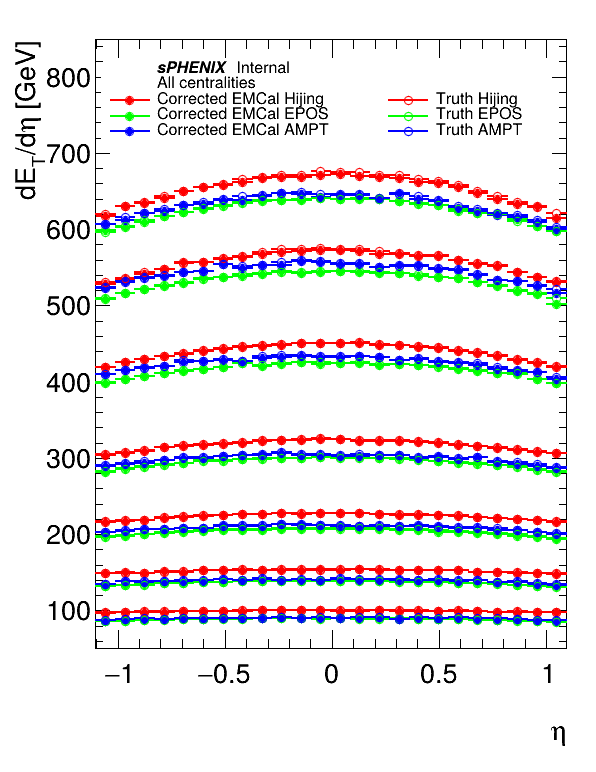

In [53]:
emcal_corr_canvas = TCanvas("emcal_corr5","",600,800)
emcal_corr_leg = ROOT.TLegend(.17,.82,.92,.92)
emcal_corr_leg.SetNColumns(2)
emcal_corr_leg.SetTextSize(0.03)
emcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
emcal_corr_leg.AddEntry("","","")
emcal_corr_leg.AddEntry("",f"All centralities","")
emcal_corr_leg.AddEntry("","","")
for i in range(len(cents)):
    if i == 0:
        emcal_corr_leg.AddEntry(emcal_detdeta_hijing[i],"Corrected EMCal Hijing","lep")
        emcal_corr_leg.AddEntry(truth_detdeta_hijing[i],"Truth Hijing","lep")
        emcal_corr_leg.AddEntry(emcal_detdeta_epos[i],"Corrected EMCal EPOS","lep")
        emcal_corr_leg.AddEntry(truth_detdeta_epos[i],"Truth EPOS","lep")
        emcal_corr_leg.AddEntry(emcal_detdeta_ampt[i],"Corrected EMCal AMPT","lep")
        emcal_corr_leg.AddEntry(truth_detdeta_ampt[i],"Truth AMPT","lep")
        emcal_corr_leg.SetBorderSize(0)
    emcal_detdeta_hijing[i].SetMarkerStyle(20)
    emcal_detdeta_hijing[i].SetLineColor(2)
    emcal_detdeta_hijing[i].SetMarkerColor(2)
    emcal_detdeta_epos[i].SetMarkerStyle(20)
    emcal_detdeta_epos[i].SetLineColor(3)
    emcal_detdeta_epos[i].SetMarkerColor(3)
    emcal_detdeta_ampt[i].SetMarkerStyle(20)
    emcal_detdeta_ampt[i].SetLineColor(4)
    emcal_detdeta_ampt[i].SetMarkerColor(4)
    emcal_detdeta_hijing[i].SetStats(0)
    emcal_detdeta_epos[i].SetStats(0)
    emcal_detdeta_ampt[i].SetStats(0)
    truth_detdeta_hijing[i].SetMarkerStyle(24)
    truth_detdeta_hijing[i].SetLineColor(2)
    truth_detdeta_hijing[i].SetMarkerColor(2)
    truth_detdeta_epos[i].SetMarkerStyle(24)
    truth_detdeta_epos[i].SetLineColor(3)
    truth_detdeta_epos[i].SetMarkerColor(3)
    truth_detdeta_ampt[i].SetMarkerStyle(24)
    truth_detdeta_ampt[i].SetLineColor(4)
    truth_detdeta_ampt[i].SetMarkerColor(4)
    if i == 0:
        emcal_detdeta_hijing[i].GetYaxis().SetRangeUser(50,850)
        emcal_detdeta_hijing[i].GetXaxis().SetRangeUser(-1.05,1.05)
        emcal_detdeta_hijing[i].SetYTitle("dE_{T}/d#eta [GeV]")
        emcal_detdeta_hijing[i].SetXTitle("#eta")
        emcal_detdeta_hijing[i].Draw()
    else:
        emcal_detdeta_hijing[i].Draw("same")
    emcal_detdeta_epos[i].Draw("same")
    emcal_detdeta_ampt[i].Draw("same")
    truth_detdeta_hijing[i].Draw("same")
    truth_detdeta_epos[i].Draw("same")
    truth_detdeta_ampt[i].Draw("same")
emcal_corr_leg.Draw()
emcal_corr_canvas.Draw()
emcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_closure.png')                

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/emcal_closure_ratio.png has been created


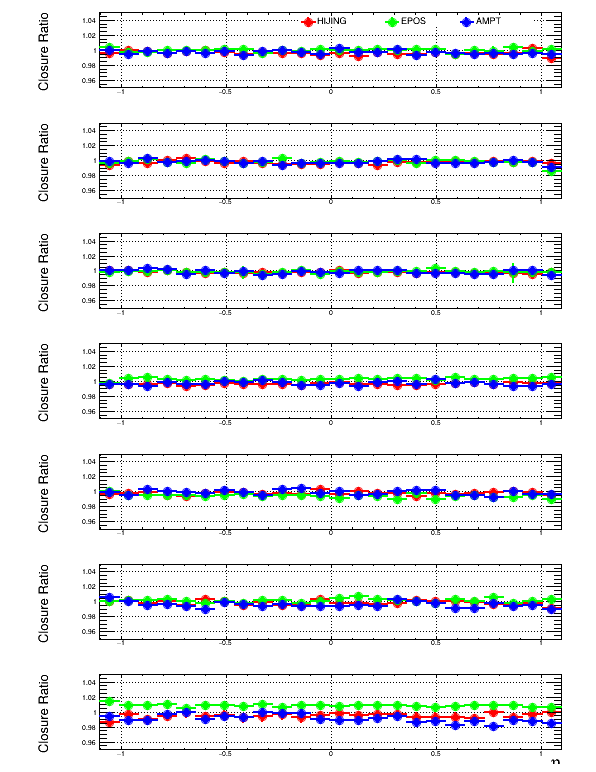

In [74]:
ratio_hijing = []
ratio_epos = []
ratio_ampt = []

emcal_ratio_canvas = TCanvas("emcal_ratio4", "", 600, 800)
emcal_ratio_canvas.Divide(1, 7)
for i in range(len(cents)):
    emcal_ratio_canvas.cd(i + 1)
    ROOT.gPad.SetGrid()

    ratio_hijing.append(emcal_detdeta_hijing[i].Clone(f"ratio_hijing_{i}"))
    ratio_epos.append(emcal_detdeta_epos[i].Clone(f"ratio_epos_{i}"))
    ratio_ampt.append(emcal_detdeta_ampt[i].Clone(f"ratio_ampt_{i}"))

    # Compute ratios
    ratio_hijing[i].Divide(truth_detdeta_hijing[i])
    ratio_epos[i].Divide(truth_detdeta_epos[i])
    ratio_ampt[i].Divide(truth_detdeta_ampt[i])

    # Set marker styles and colors
    ratio_hijing[i].SetMarkerStyle(20)
    ratio_hijing[i].SetMarkerColor(2)
    ratio_hijing[i].SetLineColor(2)

    ratio_epos[i].SetMarkerStyle(20)
    ratio_epos[i].SetMarkerColor(3)
    ratio_epos[i].SetLineColor(3)

    ratio_ampt[i].SetMarkerStyle(20)
    ratio_ampt[i].SetMarkerColor(4)
    ratio_ampt[i].SetLineColor(4)

    # Set axis labels and ranges
    ratio_hijing[i].SetYTitle("Closure Ratio")
    ratio_hijing[i].SetXTitle("#eta")
    ratio_hijing[i].GetYaxis().SetTitleOffset(0.4)
    ratio_hijing[i].GetXaxis().SetTitleOffset(0.5)
    ratio_hijing[i].GetYaxis().SetRangeUser(0.95, 1.05)
    ratio_hijing[i].GetYaxis().SetNdivisions(505)
    ratio_hijing[i].GetYaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetXaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetYaxis().SetTitleSize(0.15)
    if i == 6:
        ratio_hijing[i].GetXaxis().SetTitleSize(0.2)
    else:
        ratio_hijing[i].GetXaxis().SetTitleSize(0.0)

    # Draw the ratio plots
    ratio_hijing[i].Draw("P")
    ratio_epos[i].Draw("P same")
    ratio_ampt[i].Draw("P same")

    # Add a legend (optional, only for the first plot)
    if i == 0:
        leg = ROOT.TLegend(0.5, 0.8, 0.9, 0.9)
        leg.SetNColumns(3)
        leg.AddEntry(ratio_hijing[0], "HIJING", "lep")
        leg.AddEntry(ratio_epos[0], "EPOS", "lep")
        leg.AddEntry(ratio_ampt[0], "AMPT", "lep")
        leg.SetBorderSize(0)
        leg.SetTextSize(0.1)
        leg.Draw()

    ROOT.gPad.Modified()
    ROOT.gPad.Update()

# Draw the ratio plots canvas
emcal_ratio_canvas.Draw()
emcal_ratio_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_closure_ratio.png') 

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/hcal_closure.png has been created


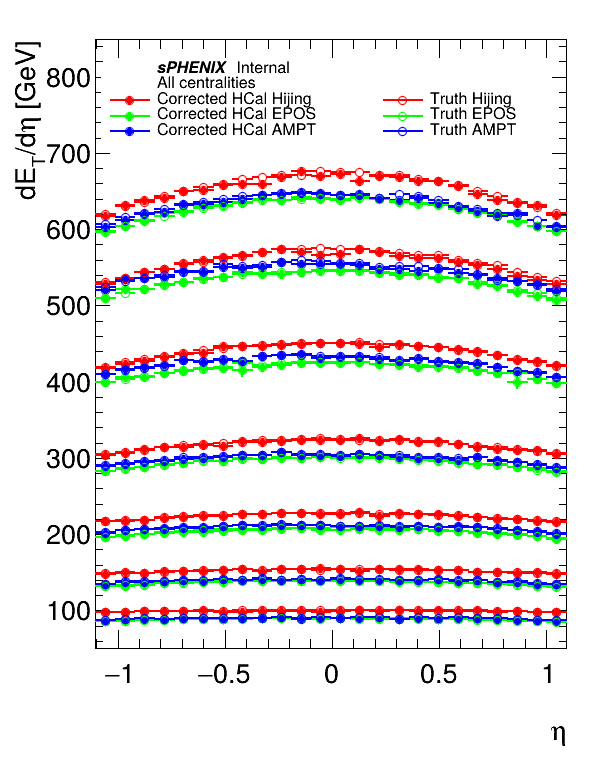

In [55]:
hcal_corr_canvas = TCanvas("hcal_corr","",600,800)
hcal_corr_leg = ROOT.TLegend(.17,.82,.92,.92)
hcal_corr_leg.SetNColumns(2)
hcal_corr_leg.SetTextSize(0.03)
hcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
hcal_corr_leg.AddEntry("","","")
hcal_corr_leg.AddEntry("",f"All centralities","")
hcal_corr_leg.AddEntry("","","")
for i in range(len(cents)):
    if i == 0:
        hcal_corr_leg.AddEntry(hcal_detdeta_hijing[i],"Corrected HCal Hijing","lep")
        hcal_corr_leg.AddEntry(truth_detdeta_hijing[i],"Truth Hijing","lep")
        hcal_corr_leg.AddEntry(hcal_detdeta_epos[i],"Corrected HCal EPOS","lep")
        hcal_corr_leg.AddEntry(truth_detdeta_epos[i],"Truth EPOS","lep")
        hcal_corr_leg.AddEntry(hcal_detdeta_ampt[i],"Corrected HCal AMPT","lep")
        hcal_corr_leg.AddEntry(truth_detdeta_ampt[i],"Truth AMPT","lep")
        hcal_corr_leg.SetBorderSize(0)
    hcal_corr_leg.SetBorderSize(0)
    hcal_detdeta_hijing[i].SetMarkerStyle(20)
    hcal_detdeta_hijing[i].SetLineColor(2)
    hcal_detdeta_hijing[i].SetMarkerColor(2)
    hcal_detdeta_epos[i].SetMarkerStyle(20)
    hcal_detdeta_epos[i].SetLineColor(3)
    hcal_detdeta_epos[i].SetMarkerColor(3)
    hcal_detdeta_ampt[i].SetMarkerStyle(20)
    hcal_detdeta_ampt[i].SetLineColor(4)
    hcal_detdeta_ampt[i].SetMarkerColor(4)
    hcal_detdeta_hijing[i].SetStats(0)
    hcal_detdeta_epos[i].SetStats(0)
    hcal_detdeta_ampt[i].SetStats(0)
    truth_detdeta_hijing[i].SetMarkerStyle(24)
    truth_detdeta_hijing[i].SetLineColor(2)
    truth_detdeta_hijing[i].SetMarkerColor(2)
    truth_detdeta_epos[i].SetMarkerStyle(24)
    truth_detdeta_epos[i].SetLineColor(3)
    truth_detdeta_epos[i].SetMarkerColor(3)
    truth_detdeta_ampt[i].SetMarkerStyle(24)
    truth_detdeta_ampt[i].SetLineColor(4)
    truth_detdeta_ampt[i].SetMarkerColor(4)
    if i == 0:
        hcal_detdeta_hijing[i].GetYaxis().SetRangeUser(50,850)
        hcal_detdeta_hijing[i].GetXaxis().SetRangeUser(-1.05,1.05)
        hcal_detdeta_hijing[i].SetYTitle("dE_{T}/d#eta [GeV]")
        hcal_detdeta_hijing[i].SetXTitle("#eta")
        hcal_detdeta_hijing[i].Draw()
    else:
        hcal_detdeta_hijing[i].Draw("same")
    hcal_detdeta_epos[i].Draw("same")
    hcal_detdeta_ampt[i].Draw("same")
    truth_detdeta_hijing[i].Draw("same")
    truth_detdeta_epos[i].Draw("same")
    truth_detdeta_ampt[i].Draw("same")
hcal_corr_leg.Draw()
hcal_corr_canvas.Draw()
hcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_closure.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hcal_ratio
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/hcal_closure_ratio.png has been created


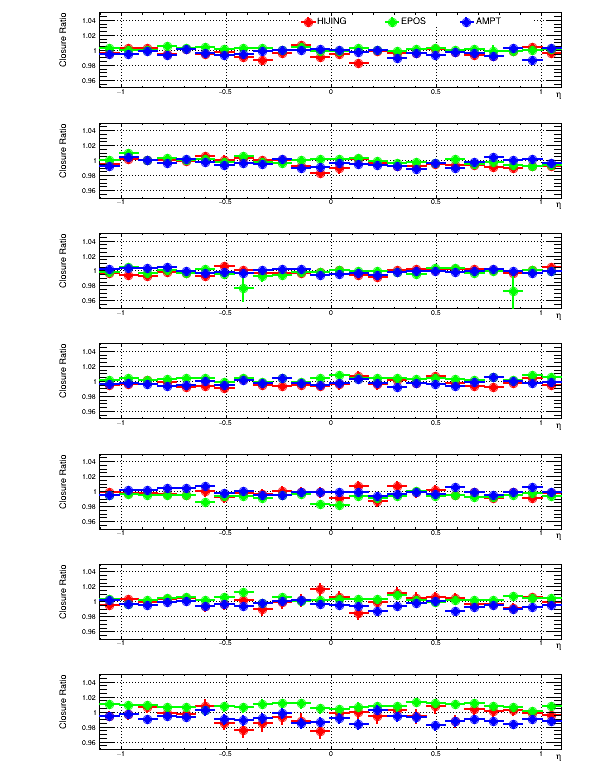

In [56]:
ratio_hijing = []
ratio_epos = []
ratio_ampt = []

hcal_ratio_canvas = TCanvas("hcal_ratio", "", 600, 800)
hcal_ratio_canvas.Divide(1, 7)
for i in range(len(cents)):
    hcal_ratio_canvas.cd(i + 1)
    ROOT.gPad.SetGrid()

    ratio_hijing.append(hcal_detdeta_hijing[i].Clone(f"ratio_hijing_{i}"))
    ratio_epos.append(hcal_detdeta_epos[i].Clone(f"ratio_epos_{i}"))
    ratio_ampt.append(hcal_detdeta_ampt[i].Clone(f"ratio_ampt_{i}"))

    # Compute ratios
    ratio_hijing[i].Divide(truth_detdeta_hijing[i])
    ratio_epos[i].Divide(truth_detdeta_epos[i])
    ratio_ampt[i].Divide(truth_detdeta_ampt[i])

    # Set marker styles and colors
    ratio_hijing[i].SetMarkerStyle(20)
    ratio_hijing[i].SetMarkerColor(2)
    ratio_hijing[i].SetLineColor(2)

    ratio_epos[i].SetMarkerStyle(20)
    ratio_epos[i].SetMarkerColor(3)
    ratio_epos[i].SetLineColor(3)

    ratio_ampt[i].SetMarkerStyle(20)
    ratio_ampt[i].SetMarkerColor(4)
    ratio_ampt[i].SetLineColor(4)

    # Set axis labels and ranges
    ratio_hijing[i].SetYTitle("Closure Ratio")
    ratio_hijing[i].SetXTitle("#eta")
    ratio_hijing[i].GetYaxis().SetTitleOffset(0.4)
    ratio_hijing[i].GetXaxis().SetTitleOffset(0.5)
    ratio_hijing[i].GetYaxis().SetRangeUser(0.95, 1.05)
    ratio_hijing[i].GetYaxis().SetNdivisions(505)
    ratio_hijing[i].GetYaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetYaxis().SetTitleSize(0.1)
    ratio_hijing[i].GetXaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetXaxis().SetTitleSize(0.1)

    # Draw the ratio plots
    ratio_hijing[i].Draw("P")
    ratio_epos[i].Draw("P same")
    ratio_ampt[i].Draw("P same")

    # Add a legend (optional, only for the first plot)
    if i == 0:
        leg = ROOT.TLegend(0.5, 0.8, 0.9, 0.9)
        leg.SetNColumns(3)
        leg.AddEntry(ratio_hijing[0], "HIJING", "lep")
        leg.AddEntry(ratio_epos[0], "EPOS", "lep")
        leg.AddEntry(ratio_ampt[0], "AMPT", "lep")
        leg.SetBorderSize(0)
        leg.SetTextSize(0.1)
        leg.Draw()

    ROOT.gPad.Modified()
    ROOT.gPad.Update()

# Draw the ratio plots canvas
hcal_ratio_canvas.Draw()
hcal_ratio_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_closure_ratio.png') 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: calo_corr
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/calo_closure.png has been created


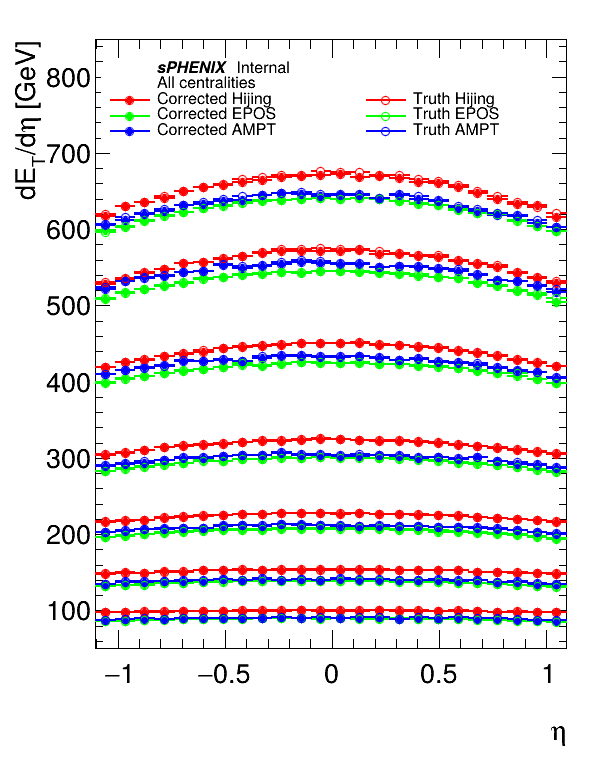

In [61]:
calo_corr_canvas = TCanvas("calo_corr","",600,800)
calo_corr_leg = ROOT.TLegend(.17,.82,.92,.92)
calo_corr_leg.SetNColumns(2)
calo_corr_leg.SetTextSize(0.03)
calo_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
calo_corr_leg.AddEntry("","","")
calo_corr_leg.AddEntry("",f"All centralities","")
calo_corr_leg.AddEntry("","","")
for i in range(len(cents)):
    if i == 0:
        calo_corr_leg.AddEntry(calo_detdeta_hijing[i],"Corrected Hijing","lep")
        calo_corr_leg.AddEntry(truth_detdeta_hijing[i],"Truth Hijing","lep")
        calo_corr_leg.AddEntry(calo_detdeta_epos[i],"Corrected EPOS","lep")
        calo_corr_leg.AddEntry(truth_detdeta_epos[i],"Truth EPOS","lep")
        calo_corr_leg.AddEntry(calo_detdeta_ampt[i],"Corrected AMPT","lep")
        calo_corr_leg.AddEntry(truth_detdeta_ampt[i],"Truth AMPT","lep")
        calo_corr_leg.SetBorderSize(0)
    calo_detdeta_hijing[i].SetMarkerStyle(20)
    calo_detdeta_hijing[i].SetLineColor(2)
    calo_detdeta_hijing[i].SetMarkerColor(2)
    calo_detdeta_epos[i].SetMarkerStyle(20)
    calo_detdeta_epos[i].SetLineColor(3)
    calo_detdeta_epos[i].SetMarkerColor(3)
    calo_detdeta_ampt[i].SetMarkerStyle(20)
    calo_detdeta_ampt[i].SetLineColor(4)
    calo_detdeta_ampt[i].SetMarkerColor(4)
    calo_detdeta_hijing[i].SetStats(0)
    calo_detdeta_epos[i].SetStats(0)
    calo_detdeta_ampt[i].SetStats(0)
    truth_detdeta_hijing[i].SetMarkerStyle(24)
    truth_detdeta_hijing[i].SetLineColor(2)
    truth_detdeta_hijing[i].SetMarkerColor(2)
    truth_detdeta_epos[i].SetMarkerStyle(24)
    truth_detdeta_epos[i].SetLineColor(3)
    truth_detdeta_epos[i].SetMarkerColor(3)
    truth_detdeta_ampt[i].SetMarkerStyle(24)
    truth_detdeta_ampt[i].SetLineColor(4)
    truth_detdeta_ampt[i].SetMarkerColor(4)
    if i == 0:
        calo_detdeta_hijing[i].GetYaxis().SetRangeUser(50,850)
        calo_detdeta_hijing[i].GetXaxis().SetRangeUser(-1.05,1.05)
        calo_detdeta_hijing[i].SetYTitle("dE_{T}/d#eta [GeV]")
        calo_detdeta_hijing[i].SetXTitle("#eta")
        calo_detdeta_hijing[i].Draw()
    else:
        calo_detdeta_hijing[i].Draw("same")
    calo_detdeta_epos[i].Draw("same")
    calo_detdeta_ampt[i].Draw("same")
    truth_detdeta_hijing[i].Draw("same")
    truth_detdeta_epos[i].Draw("same")
    truth_detdeta_ampt[i].Draw("same")
calo_corr_leg.Draw()
calo_corr_canvas.Draw()
calo_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_closure.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: calo_ratio
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/calo_closure_ratio.png has been created


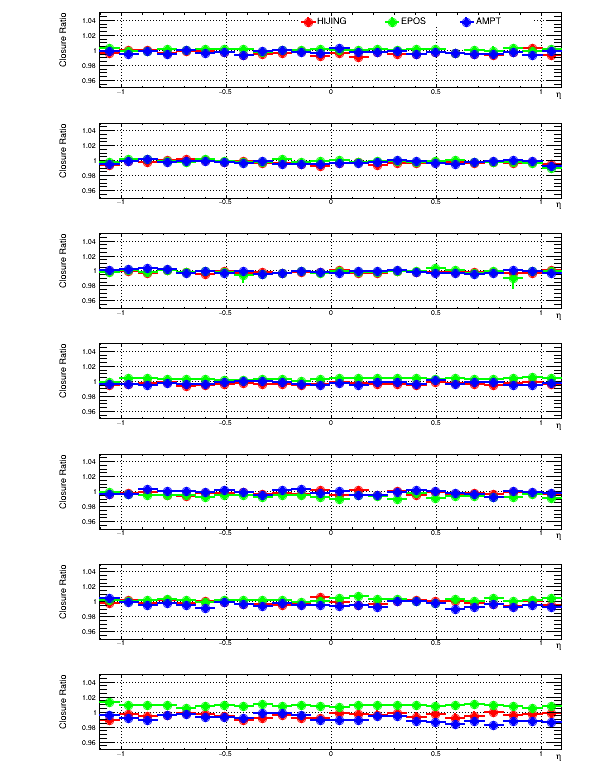

In [60]:
ratio_hijing = []
ratio_epos = []
ratio_ampt = []

calo_ratio_canvas = TCanvas("calo_ratio", "", 600, 800)
calo_ratio_canvas.Divide(1, 7)
for i in range(len(cents)):
    calo_ratio_canvas.cd(i + 1)
    ROOT.gPad.SetGrid()

    ratio_hijing.append(calo_detdeta_hijing[i].Clone(f"ratio_hijing_{i}"))
    ratio_epos.append(calo_detdeta_epos[i].Clone(f"ratio_epos_{i}"))
    ratio_ampt.append(calo_detdeta_ampt[i].Clone(f"ratio_ampt_{i}"))

    # Compute ratios
    ratio_hijing[i].Divide(truth_detdeta_hijing[i])
    ratio_epos[i].Divide(truth_detdeta_epos[i])
    ratio_ampt[i].Divide(truth_detdeta_ampt[i])

    # Set marker styles and colors
    ratio_hijing[i].SetMarkerStyle(20)
    ratio_hijing[i].SetMarkerColor(2)
    ratio_hijing[i].SetLineColor(2)

    ratio_epos[i].SetMarkerStyle(20)
    ratio_epos[i].SetMarkerColor(3)
    ratio_epos[i].SetLineColor(3)

    ratio_ampt[i].SetMarkerStyle(20)
    ratio_ampt[i].SetMarkerColor(4)
    ratio_ampt[i].SetLineColor(4)

    # Set axis labels and ranges
    ratio_hijing[i].SetYTitle("Closure Ratio")
    ratio_hijing[i].SetXTitle("#eta")
    ratio_hijing[i].GetYaxis().SetTitleOffset(0.4)
    ratio_hijing[i].GetXaxis().SetTitleOffset(0.5)
    ratio_hijing[i].GetYaxis().SetRangeUser(0.95, 1.05)
    ratio_hijing[i].GetYaxis().SetNdivisions(505)
    ratio_hijing[i].GetYaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetYaxis().SetTitleSize(0.1)
    ratio_hijing[i].GetXaxis().SetLabelSize(0.08)
    ratio_hijing[i].GetXaxis().SetTitleSize(0.1)

    # Draw the ratio plots
    ratio_hijing[i].Draw("P")
    ratio_epos[i].Draw("P same")
    ratio_ampt[i].Draw("P same")

    # Add a legend (optional, only for the first plot)
    if i == 0:
        leg = ROOT.TLegend(0.5, 0.8, 0.9, 0.9)
        leg.SetNColumns(3)
        leg.AddEntry(ratio_hijing[0], "HIJING", "lep")
        leg.AddEntry(ratio_epos[0], "EPOS", "lep")
        leg.AddEntry(ratio_ampt[0], "AMPT", "lep")
        leg.SetBorderSize(0)
        leg.SetTextSize(0.1)
        leg.Draw()

    ROOT.gPad.Modified()
    ROOT.gPad.Update()

# Draw the ratio plots canvas
calo_ratio_canvas.Draw()
calo_ratio_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_closure_ratio.png') 